**Nguyễn Tiến Dũng**

KSTN Toán Tin - K62

*20170062*

Đại học Bách khoa Hà Nội

In [1]:
import processviz as pvz
import sympy as sy

sy.init_printing()

**Câu 1:**

*a.* Tính $h_1, h_2$

Trước hết ta có $h_{00} = 1$

Gọi $h_{i0}$ là xác suất xuất phát từ trạng thái $i$ có thể đến được trạng thái $0$. Khi đó, xuất phát từ trạng thái $1$, nhận thấy rằng có $p_{1i}$ khả năng trạng thái 1 chuyển đến trạng thái $i$, và từ trạng thái $i$ đó chuyển đến trạng thái 0. Do đó ta có:

$$
h_{10} = 0.2h_{00} + 0.4h_{10}+0.2h_{20} + 0.2h_{30}
$$

Tương tự, ta có:

$$
\left\{\begin{matrix} 
h_{10} = 0.2h_{00} + 0.4h_{10}+0.2h_{20} + 0.2h_{30} \\
h_{20} = 0.3h_{00} + 0.3h_{10} + 0.2h_{20} + 0.2h_{30} \\
h_{30} = 0.5h_{00} + 0.3h_{20} + 0.2h_{30} \\
h_{00} = 1
\end{matrix}\right.
$$

Giải hệ trên ta thu được: 

$$
\left\{ \begin{matrix}
h_{10} = 1\\
h_{20} = 1 \\
h_{30} = 1
\end{matrix}\right.
$$

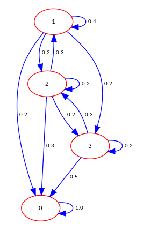

In [2]:
G = pvz.MarkovChain()
G.from_file('./ass5/input_1.csv')
G.generate_graph(1)

*b.* Tính $k_{10}, k_{20}$

Dễ thấy $k_{00} = 0$

Kí hiệu $k_{i0}$ là số bước trung bình để đi từ trạng thái $i$ đến trạng thái 0. Thấy rằng từ trạng thái $i$, ta có thể đến trạng thái $j$ mất 1 bước, rồi từ trạng thái $j$ mất trung bình $k_{j0}$ bước để đến trạng thái 0. Từ đó ta có:

$$
k_{10} = 1+0.4k_{10} + 0.2k_{20} + 0.2k_{30} + 0.2k_{00}
$$

Tương tự ta có: 

$$
\left\{\begin{matrix}
k_{00} = 0 \\
k_{10} = 1+0.4k_{10} + 0.2k_{20} + 0.2k_{30} + 0.2k_{00} \\
k_{20} = 1 + 0.3k_{00} + 0.3k_{10} + 0.2k_{20} + 0.2k_{30} \\
k_{30} = 1 + 0.5k_{00} + 0.3k_{20} + 0.2k_{30}
\end{matrix}\right.
$$

Giải hệ trên ta thu được 

$$
\left\{\begin{matrix}
k_{00} = 0\\
k_{10} = \frac{500}{141} \sim 3.55 \\
k_{20} = \frac{150}{47} \sim 3.19 \\
k_{30} = \frac{115}{47} \sim 2.45
\end{matrix}\right.
$$

**Câu 2:** 
*a.* Tư tưởng chính là xây dựng bài toán sử dụng công thức truy hồi. Đầu tiên, ta sẽ tính $P_2$.

Giả sử ma trận $P$ có kích thước $(m+n) \times (m+n)$, trong đó tương ứng các thành phần có kích thước như sau:

- Ma trận đơn vị $I$: $m \times m$
- Ma trận O: $m \times n$
- Ma trận R: $n \times m$
- Ma trận Q: $n \times n$

Ma trận $P^2$ hiển nhiên cũng có thể chia ra thành các phần như trên. Giả sử 

$$
P^2 = \begin{pmatrix}
I_2 & |& O_2 \\ 
 R_2 & |& Q_2
\end{pmatrix}
$$

Ta sẽ chứng minh $I_2 = I$ và $O_2 = O$.

Thật vâỵ, với $P_{ij}^{2} \in I_2$ ta có:

$$
P_{ij}^2 = \sum_{k=1}^{m+n}P_{ik}P_{kj} = \sum_{k=1}^{m}P_{ik}P_{kj} + \sum_{k=m+1}^{m+n}P_{ik}P_{kj}
$$

Do $(i, j)$ nằm trong $I_2$ nên $1 \le i, j \le m$. Thấy rằng: 

- Nếu $i=k$ thì $P_{ik} = 1$, mọi i
- Nếu $i \ne k$ thì $P_{ik} = 0$, mọi i

Do đó $\sum_{k=1}^{m}P_{ik}P_{kj} = 1$ nếu $i=j$ và bằng 0 nếu $i \ne j$

Xét $\sum_{k=m+1}^{m+n}P_{ik}P_{kj}$, dễ thấy tổng này bằng 0 do $P_{ik}$ lúc này thuộc phần ma trận $O$.

Từ 2 điều trên, suy ra $I_2 = I$.

Chứng minh hoàn toàn tương tự ta cũng có $O_2 = O$.

---

> Gọi $X_{c(k)}$ là cột thứ $k$ của ma trận $X$; $X_{r(k)}$ là hàng thứ $k$ của ma trận $X$. 

---

Ta tính các vị trí $R_2$. 

Ta có:

$$
P_{ij}^2 = \sum_{k=1}^{m+n}P_{ik}P_{kj} = \sum_{k=1}^{m}P_{ik}P_{kj} + \sum_{k=m+1}^{m+n}P_{ik}P_{kj}
$$

Xét $(i, j) \in R_2$. 

Xét tổng $\sum_{k=1}^{m}P_{ik}P_{kj}$. Dễ thấy với $k = j$ thì $P_{kj} = 1$ và $P_{kj} = 0$ nếu $k \ne j$. Do đó $\sum_{k=1}^{m}P_{ik}P_{kj} = P_{ij}$.

Xét $\sum_{k=m+1}^{m+n}P_{ik}P_{kj} = R_{ck}.Q_{rk}$. Điều này chứng tỏ với $P_{ij}^2 \in R_2$ thì $P_{ij}^2 = P_{ij} + R_{c(j)}Q_{r(i)}$

---

Tính $Q_2$:

Ta có:

$$
Q_{ij}^2 = \sum_{k=1}^{m+n}P_{ik}P_{kj} = \sum_{k=1}^{m}P_{ik}P_{kj} + \sum_{k=m+1}^{m+n}P_{ik}P_{kj}
$$

Xét $(i, j) \in Q_2$. 

Xét tổng $\sum_{k=1}^{m}P_{ik}P_{kj}$. Dễ thấy với $P_{kj} = 0$ với mọi $k$. Do đó $\sum_{k=1}^{m}P_{ik}P_{kj} = 0$.

Xét $\sum_{k=m+1}^{m+n}P_{ik}P_{kj} = Q.Q = Q^2$. Điều này chứng tỏ với $P_{ij}^2 \in Q_2$ thì $Q_{ij}^2 = Q_{r(i)}Q_{c(j)}$, hay $Q_2 = Q^2$

---

Lập luận hoàn toàn tương tự, ta có thể chứng minh được ma trận $P^n$ như sau: 

$$
P^n = \begin{pmatrix}
I & |& O \\ 
 R_n & |& Q_n
\end{pmatrix}
$$

trong đó:
- $Q_n = Q^n$
- $R_n$ được xác định như sau:
    - $R_{n, (ij)} = R_{1, c(j)}*Q_{n-1, r(i)}$
    
---

**Remark:** Đến đây thì em có thể lập trình được chương trình tính ma trận $P^n$ dạng này, mà em nghĩ còn rút gọn được hơn nữa

---

**Câu 3:** Mê cung có dạng như sau:

|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |

---

*a.* Xét $$P(X_{n+1} = i_{n+1}|X_n = i_n,...,X_0 = i_0) = \frac{P(X_{n+1} = i_{n+1},X_n = i_n,...,X_0 = i_0)}{P(X_n = i_n,...,X_0 = i_0)} = \frac{P(X_{n+1} = i_{n+1},X_n = i_n|X_{n-1} = i_{n-1},...,X_0 = i_0)}{P(X_n = i_n|X_{n-1}=i_{n-1}...,X_0 = i_0)}$$
$$
= \frac{P(X_{n+1} = i_{n+1}|X_n = i_n)P(X_n = i_n|X_{n-1} = i_{n-1},...,X_0 = i_0)}{P(X_n = i_n|X_{n-1}=i_{n-1}...,X_0 = i_0)} = P(X_{n+1} = i_{n+1}|X_n = i_n)
$$

chứng tỏ $(X_n)$ là xích Markov.

*b.* Với sơ đồ mê cung như trên ta có ma trận xác suất chuyển như sau

$$
P = \left(\begin{matrix}
0 & 0.5 & 0 &0.5&0&0&0&0&0 \\
\frac{1}{3} & 0& \frac{1}{3} & 0 &\frac{1}{3}&0&0&0& 0\\
0 & 0.5 & 0 & 0 & 0 & 0.5&0&0&0 \\
\frac{1}{3}&	0	&0	&0&	\frac{1}{3}&	0	&\frac{1}{3}&	0	&0 \\
0	&0.25&	0	&0.25&	0	&0.25&	0 &	0.25&	0 \\
0&	0&	\frac{1}{3}&	0&	\frac{1}{3}&	0&	0&	0&	\frac{1}{3} \\
0&	0&	0&	0.5&	0&	0&	0&	0.5&	0 \\
0&	0&	0	&0&	\frac{1}{3}&	0&	\frac{1}{3}&	0&	\frac{1}{3} \\
0&	0&	0&	0&	0&	0&	0&	0&	1
\end{matrix}\right)
$$

---

*c.* Gọi $k_i$ là thời gian trung bình con chuột rơi vào bẫy. Ta cần tính $k_1$.

Từ trạng thái 1, con chuột có thể tới được các trạng thái $2, 4$ sau 1 bước rồi từ đó tốn tương ứng trung bình $k_2, k_4$ bước để đến trạng thái $9$.

Ta có quan hệ $k_1 = 1 + 0.5(k_2 + k_4)$. Lập luận tương tự ta thu được: 

$$
\left\{\begin{matrix}
k_1 = 1 + 0.5(k_2 + k_4) \\
k_2 = 1 + \frac{1}{3}(k_5  + k_1 + k_3) \\
k_3 = 1 + 0.5(k_2 + k_6) \\
k_4 = 1 + \frac{1}{3}(k_1 + k_5 + k_7) \\
k_5 = 1 + \frac{1}{4}(k_2 + k_4 + k_6 + k_8) \\
k_6 = 1 + \frac{1}{3}(k_3 + k_5 + k_9) \\
k_7 = 1 + 0.5(k_4 + k_8)\\
k_8 = 1 + \frac{1}{3}(k_5 + k_7 + k_9) \\
k_9 = 0
\end{matrix}\right.
$$

Hệ phương trình trên có thể viết lại thành:

$$
Ak = b
$$

trong đó $A = I - P, k = (k_1, k_2,...,k_8,0)^T, b=(1,1,1,1,1,1,1,1,0)^T$

Giải hệ trên ta được $k = (17.88, 16.88, 14.90, 16.87, 14.90,
       10.92, 14.90, 10.92, 0)^T$

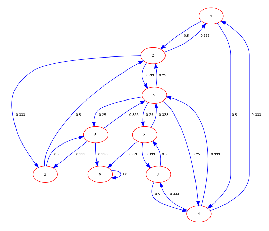

In [3]:
G3 = pvz.MarkovChain()
G3.from_file('./ass5/input_2.csv')
G3.generate_graph()

**Câu 4:** Xét $(X_n)$ với $X_n$ là số điểm ở lần gieo thứ $n$. Dễ thấy $(X_n)$ là xích Markov.

Ta tính xác suất gieo được $k$ điểm, $2\le k \le 12$.

Gọi số điểm trên con thứ nhất và thứ hai lần lượt là $x_1, x_2$. Ta có 

$$
x_1 + x_2 = k
$$

Không gian mẫu $6 \times 6 = 36$. Không gian trạng thái $I = \{2,3,4,...,12\}$

Từ đó ta có bảng phân phối xác suất như sau:

---

**Câu 5:**

Xét ma trận xác suất chuyển $P$, không gian trạng thái $I$ và tập các trạng thái hút $S$. Ta có:

$$
P_{ii} = 1, \forall i \in S
$$

Thời gian trung bình được xác định như sau;

$$
\left\{\begin{matrix}
k_i = 0, \forall i \in S\\
k_i = 1+\sum_{j \in I / S}{P_{ij}k_j}
\end{matrix}\right.
$$

Chuyển vế ta được 

$$
\left\{\begin{matrix}
k_i = 0, \forall i \in S\\
(1-P_{ii})k_i - \sum_{j \ne i \in I / S}{P_{ij}k_j} = 1
\end{matrix}\right.
$$

Hay ta được hệ phương trình viết lại dưới dạng ma trận như sau: 

$$
A_1k = b_1
$$

trong đó $A_1 = I - P, b_1 = (b_{1i})$ thỏa mãn $b_{1i} = 0$ nếu $i \in S$ và $b_{1i} = 1$ nếu $i \notin S$.

Dễ thấy rằng $A_1$ là một `singular matrix`, do đó ta sẽ loại bớt tất cả những hàng $i$ có giá trị bằng 0 và cột $i$ tương ứng để được ma trận $A$. 

Thực hiện tương tự với $b_1$, ta xóa hết tất cả các hàng có số $0$.

```python
def _get_index(self, state_set):
    idx_list = []
    tmp = list(self.state)
    try:
    for state in state_set:
        idx_list.append(tmp.index(state))
        del tmp
    except:
        return "State is not in the state set"
    return idx_list
```

> Hàm trên lấy ra tất cả các vị trí của trạng thái có trong tập hút

```python
def get_mean_time(self, target_set):
    try:
        idx_list = self._get_index(target_set)
        state_list = self._get_mean_state_list(target_set)
        P = self.data
        P = np.delete(P, idx_list, 0)
        P = np.delete(P, idx_list, 1)
        I = np.identity(len(P))
        A = np.subtract(I, P)
        b = np.transpose(np.ones(len(P)))
        x = np.round(np.matmul(np.linalg.inv(A), b), 2)
        del idx_list, P, I, A, b
        mean_time = {"Mean time spent of " +
                     state: x_val for (state, x_val) in zip(state_list, x)}
        return mean_time
    except:
        return "Check your state or matrix"
```

Thực hiện giải hệ phương trình trên bằng cách nhân với nghịch đảo của ma trận $A$. Kết quả trả về là dictionary tương ứng giữa `mean time spent` và trạng thái.

---

Thực hiện chạy với ví dụ của **câu 3**. Ta có:

In [4]:
G3.get_mean_time(['9'])

{'Mean time spent of 1': 17.87,
 'Mean time spent of 2': 16.87,
 'Mean time spent of 3': 14.9,
 'Mean time spent of 4': 16.87,
 'Mean time spent of 5': 14.9,
 'Mean time spent of 6': 10.92,
 'Mean time spent of 7': 14.9,
 'Mean time spent of 8': 10.92}

**Remark:** Tạm thời em đang để làm tròn đến 2 chữ số thập phân. 